Model Accuracy: 0.50
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.53      0.51      6020
           1       0.50      0.46      0.48      6008

    accuracy                           0.50     12028
   macro avg       0.50      0.50      0.50     12028
weighted avg       0.50      0.50      0.50     12028

[[3180 2840]
 [3218 2790]]


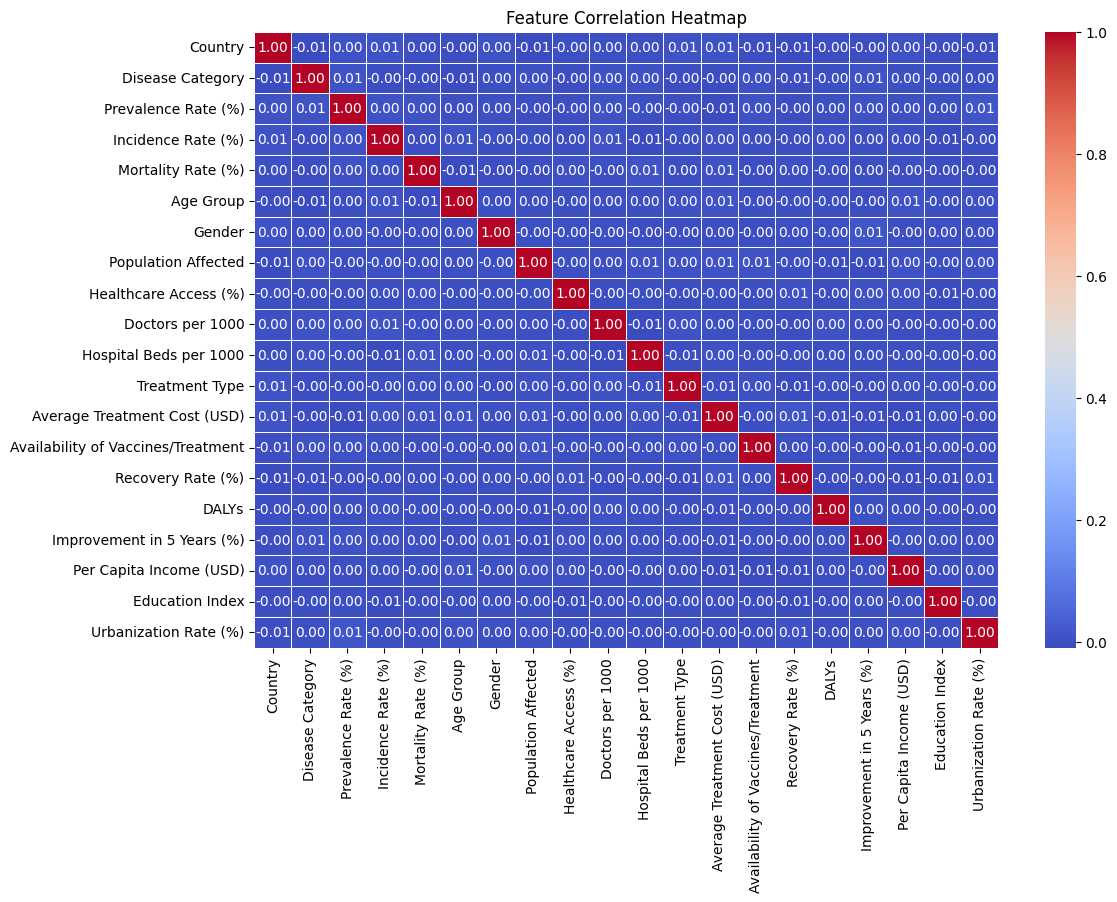

C:\Users\adars\AppData\Local\Temp\ipykernel_19996\3305462944.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Availability of Vaccines/Treatment"], palette="pastel")


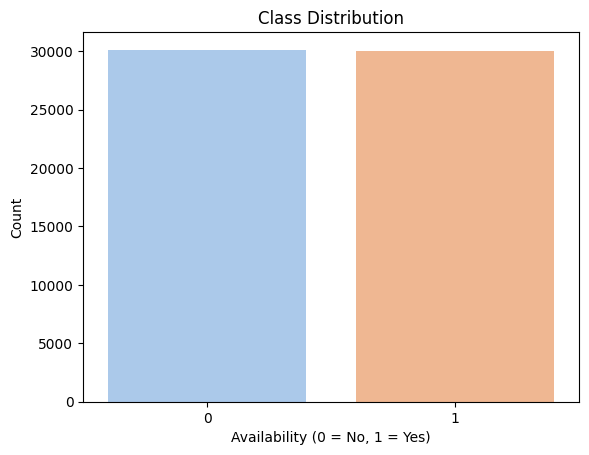

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


file_path = r"D:\weka dataset\ML_dataset3.csv"  # Change this to your actual file path
df = pd.read_csv(file_path)


df = df.drop(columns=["Disease Name", "Year"])  # Removing non-contributing columns

target_column = "Availability of Vaccines/Treatment"

if target_column not in df.columns:
    raise ValueError(f"Column '{target_column}' not found in dataset!")

label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    if col != target_column:  
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

df[target_column] = df[target_column].map({"Yes": 1, "No": 0})

X = df.drop(columns=[target_column])
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


nb_model = GaussianNB()

nb_model.fit(X_train, y_train)


y_pred = nb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)
print(confusion_matrix(y_test, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

sns.countplot(x=df["Availability of Vaccines/Treatment"], palette="pastel")
plt.title("Class Distribution")
plt.xlabel("Availability (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


